#### Importar lo necesario

In [ ]:
import torch
import torchvision
import numpy as np
import random
import matplotlib.pyplot as plt


## Cargamos una imagen de ejemplo para ver la operación de convolución

In [ ]:
# desde el escritorio
# perro.jpg
from google.colab import files
files.upload()


Saving perro.jpg to perro.jpg


{'perro.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc2\x00\x11\x08\x01,\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x03\x00\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x05\x04\x06\x07\x08\xff\xc4\x00\x19\x01\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf7,\x93v\xce\xa8\xa0\xa2\x82\x86

In [ ]:
# desde colab
# perro.jpg

from google.colab import drive
drive.mount("/content/drive")




Mounted at /content/drive


La variable img es del tipo:  <class 'numpy.ndarray'>
Los números son del tipo:  uint8
Sus dimensiones son:  (300, 500, 3)


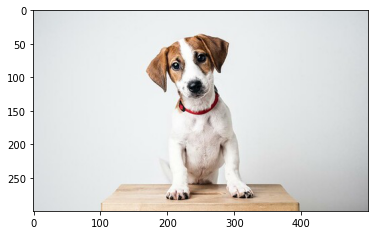

In [ ]:
# load and display an image with Matplotlib

from matplotlib import image
from matplotlib import pyplot

# load image as pixel array
img = image.imread('perro.jpg')
#img = image.imread('/content/drive/My Drive/CIA_marcos/deep_learning/clase_5/perro.jpg')

# summarize shape of the pixel array
print('La variable img es del tipo: ', type(img))
print('Los números son del tipo: ', img.dtype)
print('Sus dimensiones son: ', img.shape)

# display the array of pixels as an image
pyplot.imshow(img)
pyplot.show()

## Ejemplo de operación de convolución
### Adaptación del formato requerido para pytorch



documentacion de pytorch
torch.nn.functional

Los bloques `functional` ejecutan la operación matemática indicada.

```
torch.nn.functional.conv2d(input, weight, bias=None, stride=1, padding=0, dilation=1, groups=1) → Tensor
```
**input** – input tensor of shape (batch, in_channels, iH, iW)

**weight** – filters of shape (out_channels, in_channels, kH, kW)

**bias** – optional bias tensor of shape (out_channels). Default: None

**stride** – the stride of the convolving kernel. Can be a single number or a tuple (sH, sW). Default: 1

**padding** –
implicit paddings on both sides of the input. 
Can be a string {‘valid’, ‘same’}, single number or a tuple (padH, padW). Default: 0 
padding='valid' is the same as no padding. 
padding='same' pads the input so the output has the shape as the input. 
However, this mode doesn’t support any stride values other than 1.



---
**output** - es un tensor de dimensiones (batch_size, out_channels, Hout, Wout)

size:
```
input.shape = [batch_size, n_channels_in, H_in, W_in]

output.shape = [batch_size, n_channels_out, H_out, W_out]
```
con:

$$ H\_out = \lfloor\frac{H\_in-kernel\_size+2*padding}{stride} +1 \rfloor$$

$$ W\_out = \lfloor\frac{W\_in-kernel\_size+2*padding}{stride} +1 \rfloor$$





shape tensor from numpy
torch.Size([300, 500, 3])


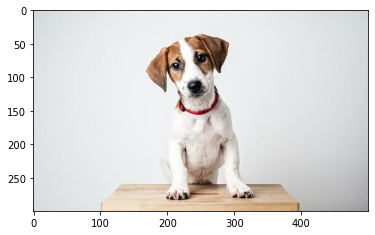

se agrega la dimension del batch size
torch.Size([1, 300, 500, 3])
vemos dtype
torch.float32
reordenamos el tensor y convertimos a float
nuevas dimensiones de tensor DESPUES agregar dim de batch, ordenar y formato de datos
tamaño_batch, nro_canales, vert_pixeles, hor_pixeles


(torch.Size([1, 3, 300, 500]), torch.float32)

In [ ]:
# convertir la imágen en tensor con dimensiones (N, C_in, H, W) (batch_size, n_chanels, height, width)
# creamos tensor
img_tensor = torch.from_numpy(img/255.).float()  # <- no hace copia
#img_tensor = torch.tensor(img)     # <- hace copia
print('shape tensor from numpy')
print(img_tensor.shape)

# veamos de tener al perrito aún con nosotros
pyplot.imshow(img_tensor)
pyplot.show()


# se agrega dimension del batch size
img_tensor = img_tensor.unsqueeze(0)                                             # IMPORTANTE
print('se agrega la dimension del batch size')
print(img_tensor.shape)

# vemos tipo de data type
print('vemos dtype')
print(img_tensor.dtype)

# reordenamos la información y convertimos a float
print('reordenamos el tensor y convertimos a float')
img_tensor = img_tensor.permute(0, 3, 1, 2).float()                              # IMPORTANTE

# vemos como queda todo
print('nuevas dimensiones de tensor DESPUES agregar dim de batch, ordenar y formato de datos')
print('tamaño_batch, nro_canales, vert_pixeles, hor_pixeles')
img_tensor.shape, img_tensor.dtype


In [ ]:
# generamos un kernel de dimension 3x3 y valores  de 1 (es un filtro "pasa todo"... no queremos detectar nada...)
# se agrega una escala para que el resultado siga estando acotado entre 0 y 1
# y así poder graficar la salida.

ks = 3 # kernel size
ch_out = 1
k1= torch.ones(ch_out,3,ks,ks)*torch.tensor(1/((ks*ks)*ch_out))
#k1= torch.rand(ch_out,3,ks,ks)*torch.tensor(1/((ks*ks)*ch_out))
print(k1, k1.dtype)

tensor([[[[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]],

         [[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]],

         [[0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111],
          [0.1111, 0.1111, 0.1111]]]]) torch.float32


### Calculamos ahora la convolución

In [ ]:
salida = torch.nn.functional.conv2d(img_tensor, k1, stride=1, padding=0)
print('Tamaño de salida: ', salida.shape)
# elimino batch_size
salida = salida.squeeze()
print('Tamaño de salida squeeze: ', salida.shape)
dimension = salida.squeeze().dim()
if dimension >2:
  salida = salida.permute(1, 2, 0)
  print('Tamaño de salida re-ordenada: ', salida.shape)
  #salida = salida/torch.max(salida)


Tamaño de salida:  torch.Size([1, 1, 298, 498])
Tamaño de salida squeeze:  torch.Size([298, 498])


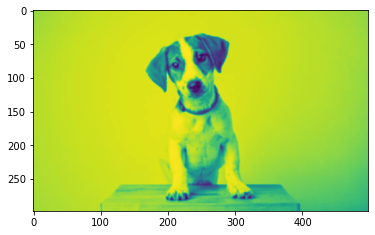

In [ ]:
# display the array of pixels as an image
pyplot.imshow(salida)
pyplot.show()


## Ejemplo capa convolución

Documentación de pytorch
torch.nn.Conv2d

```
class
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
```



**in_channels (int)** – Number of channels in the input image

**out_channels (int)** – Number of channels produced by the convolution

**kernel_size (int or tuple)** – Size of the convolving kernel

**stride (int or tuple, optional)** – Stride of the convolution. Default: 1

**padding (int, tuple or str, optional)** – Padding added to all four sides of the input. Default: 0

**padding_mode (string, optional)** – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

**bias (bool, optional)** – If True, adds a learnable bias to the output. Default: True

### **OJO!**

size:
```
input.shape = [batch_size, n_channels_in, H_in, W_in]

output.shape = [batch_size, n_channels_out, H_out, W_out]
```
con:

$$ H\_out = \lfloor\frac{H\_in-kernel\_size+2*padding}{stride} +1 \rfloor$$

$$ W\_out = \lfloor\frac{W\_in-kernel\_size+2*padding}{stride} +1 \rfloor$$


---
**output** es un objeto , ya que ```torch.nn.Conv2d``` es una clase.



In [ ]:
# creamos 1 filtro (out_channels = 1) de tamaño 3x3
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size = 3)

# con eso se creó el objeto.. ahora hay que pasarle el tensor a convolucionar...
output = conv(img_tensor)

# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 1, 298, 498])

In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size = 3, padding = 'same', stride = 1)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 1, 300, 500])

In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 1, kernel_size = 85, padding = 1, stride = 1)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 1, 218, 418])

### Convolución padding y stride
`padding` controls the amount of padding applied to the input. It can be either a string **{‘valid’, ‘same’}** or **a tuple of ints** giving the amount of implicit padding applied on both sides.

`stride`  controls the stride for the cross-correlation, a **single number or a tuple**.




In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 3, padding = 1)
output = conv(img_tensor)
# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 3, 300, 500])

In [ ]:
conv = torch.nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 3, padding = 1, stride = 2)

output = conv(img_tensor)

# dimensiones: (N, #filtros, H_out, W_out)
output.shape

torch.Size([1, 3, 150, 250])

# Pooling

Tambien está definida una funcion `torch.nn.functional.max_pool2d` que ejecuta la operación matemática o una clase `torch.nn.MaxPoll2d` que genera una capa de NN (hay otras pooling functions también). 
Vamos ver la clase directamente.

De la documentación tenemos


```
class
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
```
Parámetros


**kernel_size** – the size of the window to take a max over

**stride** – the stride of the window. **Default value is kernel_size**

**padding** – implicit zero padding to be added on both sides

**dilation** – a parameter that controls the stride of elements in the window

**return_indices** – if True, will return the max indices along with the outputs. Useful for torch.nn.MaxUnpool2d later

**ceil_mode** – when True, will use ceil instead of floor to compute the output shape


---



**output** es un objeto , ya que ```torch.nn.MaxPool2d``` es una clase.


In [ ]:
# creo el objeto (capa) de pooling
pool = torch.nn.MaxPool2d(10, padding=0)                             # ver: stride, otras pooling functions
#pool = torch.nn.MaxPool2d(10, padding=0, stride=10)
#pool = torch.nn.MaxPool2d(10, padding=0, stride=5)
#pool = torch.nn.AvgPool2d(5, padding=0, stride=5)

# le paso una imagen (el perrito!)
output = pool(img_tensor)
output.shape

torch.Size([1, 3, 30, 50])

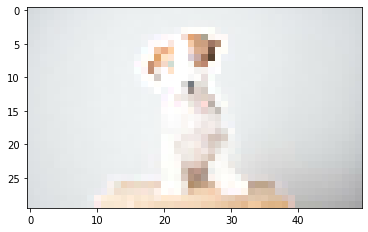

In [ ]:
plt.imshow(output.squeeze(0).permute(1,2,0))
plt.show()